In [0]:
import numpy as np

In [0]:
from math import e

In [0]:
import matplotlib.pyplot as plt

In [0]:
class neural_network(object):

  #defining the sigmoid function
  def sigmoid(self,x):
    s = 1/(1+e**(-x))
    return s

  #training the model with default values of learning rate,iterations and regularisation parameter
  def fit(self,x_train,y,k,layers,iter_count=1500,alpha=0.005,lamda=0):
    x=np.array(x_train)
    y=np.array(y)
  #the no. of classes
    self.k=k
    m=x.shape[0]
    n=x.shape[1]
  #initialising weights
    self.theta=[]
    for a in range(len(layers)+1):
      if a==0:
        self.theta.append(np.random.randn(layers[a],n+1))
      elif a<len(layers):
        self.theta.append(np.random.randn(layers[a],layers[a-1]+1))
      if a==len(layers):
        self.theta.append(np.random.randn(self.k,layers[len(layers)-1]+1))
    X=np.zeros((m,n))
  #normalising the data
    for a in range(n):
      X[:,a]=(x[:,a]-np.mean(x[:,a]))/(np.std(x[:,a])+1e-09)
    X=np.hstack((np.ones((m,1)),X))
    Y=np.zeros((m,self.k))
  #converting y into one Vs all type
    for a in range(m):
      Y[a,y[a]]=1 
    self.l=[]
    self.p=[]
    a=100
  #mini-batch gradient descent
    for b in range(iter_count):
      for i in range(int(m/a)):
        cost_func=0
        delta=[]
        Delta=[]
        D=[]
        act=[]
  #creating the delta matrices and gradient matrices
        for c in range(len(layers)+1):
            if c==0:
              Delta.append(np.zeros((layers[c],n+1)))
              D.append(np.zeros((layers[c],n+1)))
            elif c<len(layers):
              Delta.append(np.zeros((layers[c],layers[c-1]+1)))
              D.append(np.zeros((layers[c],layers[c-1]+1)))
            if c==len(layers):
              Delta.append(np.zeros((self.k,layers[c-1]+1)))
              D.append(np.zeros((self.k,layers[c-1]+1)))
            theta1 = self.theta[c]
  #calculating the cost function
            cost_func += (lamda/(2*a))*np.sum(theta1[:,1:]**2)
  #forward propagation to find all activations and hypothesis
        for j in range(len(layers)+1):
          theta1 = np.array(self.theta[j])
          if j==0: 
           a1 = X[i*a:i*a+a,:].T
          else: 
            a1 = a2
          z2 = np.dot(theta1,a1)
          a2 = self.sigmoid(z2)
          if j!=len(layers):
            a2 = np.vstack((np.ones((1,a)),a2))
          act.append(a2)
        y1 = Y[i*a:i*a+a,:].T
        h=act[len(act)-1]
        cost_func += -(np.sum(y1*np.log(h)+(1-y1)*np.log(1-h)))/a
  #calculating delta vector for backward propagation
        deltan = h-y1
  #backward propagation to find gradients
        for j in range(len(layers),0,-1):
          theta2 = self.theta[j] 
          a2 = act[j-1]
          if j==len(layers):
            delta3 = deltan
          else:
            delta3 = delta2
          delta2 = np.dot(theta2[:,1:].T,delta3)*(a2[1:,:]*(1-a2[1:,:]))
          Delta[j] += np.dot(delta3,a2.T)
        Delta[0] += np.dot(delta2,X[i*a:i*a+a,:])
  #updating all the theta matrices using calculated gradients
        for j in range(len(layers)+1):
          thetax = self.theta[j]
          thetax[:,0] = 0
          D[j] = Delta[j]/a + (lamda/a)*thetax
          self.theta[j] = self.theta[j] - alpha*D[j]
      self.l.append(cost_func)
      self.p.append(b)

  #prints all the theta matrices
  def get_params(self):
    for i in range(len(self.theta)):
      print(self.theta[i])

  #predicting the classes based on trained model
  def predict(self,x_test):
    x=np.array(x_test)
    m=x.shape[0]
    n=x.shape[1]
    X=np.zeros((m,n))
  #normalisation
    for a in range(n):
      X[:,a]=(x[:,a]-np.mean(x[:,a]))/(np.std(x[:,a])+1e-09)
    X=np.hstack((np.ones((m,1)),X))
    y_pred = np.zeros((m,1))
    a=100
  #mini batch for calculating the hypothesis by forward propagation
    for i in range(int(m/a)):
        for j in range(len(self.theta)):
          theta1 = np.array(self.theta[j])
          if j==0: 
           a1 = X[i*a:i*a+a,:].T
          else: 
            a1 = a2
          z2 = np.dot(theta1,a1)
          a2 = self.sigmoid(z2)
          if j!=len(self.theta)-1:
            a2 = np.vstack((np.ones((1,a)),a2))
          if j==len(self.theta)-1:
            h = a2;
        y_pred[i*a:i*a+a] = np.argmax(h,axis=0).reshape((a,1))
  #returning predicted classes
    return y_pred

  #classifies a prediction as correct only if it is equal to the original class
  def accuracy(self,y_pred,y_true):                                             
      p = 0
      m = len(y_true)
      for a in range(m):                                                        
        if y_true[a]==y_pred[a]:                
          p+=1
      return (p*100)/m

  #splits the data into training set and testing set based on input split fraction
  def split_train_test(self,X,y,split):                                         
        m = size()
        n = split*np.size(y,axis=0)
        x_train = X[0:n,:]
        x_test = X[n:,:]
        y_train = y[0:n]
        y_test = y[n:]
        return x_train,x_test,y_train,y_test

  #plots cost function versus the no. of iterations
  def plot(self):
    plt.plot(self.p,self.l)

In [0]:
import pandas as pd

In [0]:
df1 = pd.read_csv("sample_data/mnist_train_small.csv",header = None)

In [0]:
df2 = pd.read_csv("sample_data/mnist_test.csv",header = None)

In [0]:
y_train = df1[0]

In [0]:
y_test = df2[0]

In [0]:
x_train = df1.drop(0,axis = 1,inplace = False)


In [0]:
x_test = df2.drop(0,axis= 1,inplace = False)

In [0]:
model = neural_network()

In [0]:
model.fit(x_train,y_train,10,(20,20,10,20,),0.05,0.15)

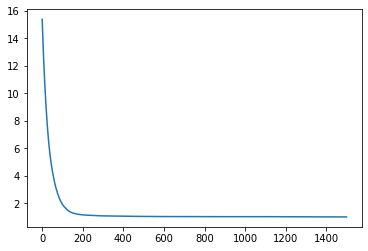

In [0]:
model.plot()

In [0]:
y_pred = model.predict(x_train)
model.accuracy(y_pred,y_train)

98.325

In [0]:
y_pred = model.predict(x_test)
model.accuracy(y_pred,y_test)

92.81

In [9]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20,20,10,20,), max_iter=2000)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 10, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
y_pred = mlp.predict(x_test)

In [0]:
def accuracy(y_pred,y_true):                                             
      p = 0
      m = len(y_true)
      for a in range(m):                                                        
        if y_true[a]==y_pred[a]:                
          p+=1
      return (p*100)/m

In [16]:
accuracy(y_pred,y_test)

92.21